In [1]:
from pathlib import Path
from typing import Union
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
image = '/home/haris/BAYC-Animated-BoredApes/ape_src/ape2.jpg'
faceLandmarks = '/home/haris/BAYC-Animated-BoredApes/ape_src/ape2_face_open_mouth.txt'
startpoint = 1
endpoint = 68


In [3]:
def drawPoints(image, faceLandmarks, startpoint, endpoint, isClosed=False):
    points = []
    image = cv2.imread(image, 0)
    for i in range(startpoint, endpoint+1):
        point = [faceLandmarks[i][0], faceLandmarks[i][1]]
        points.append(point)

    points = np.array(points, dtype=np.int32)
    img = cv2.polylines(image, [points], isClosed, (255, 200, 0),
                  thickness=1, lineType=cv2.LINE_8)
    # Displaying the image
    while(1):

        cv2.imshow('image', image)
        if cv2.waitKey(0) & 0xFF == 27:
            break

    cv2.destroyAllWindows()


In [4]:
def facePoints(image, faceLandmarks):
    assert(len(faceLandmarks) == 68)
    drawPoints(image, faceLandmarks, 0, 16)           # 0-16: Jaw line
    drawPoints(image, faceLandmarks, 17, 21)          # 17-21: Left eyebrow
    drawPoints(image, faceLandmarks, 22, 26)          # 22-26: Right eyebrow
    drawPoints(image, faceLandmarks, 27, 30)          # 27-30: Nose bridge
    drawPoints(image, faceLandmarks, 30, 35, True)    # 30-35: Lower nose
    drawPoints(image, faceLandmarks, 36, 41, True)    # 36-41: Left eye
    drawPoints(image, faceLandmarks, 42, 47, True)    # 42-47: Right Eye
    drawPoints(image, faceLandmarks, 48, 59, True)    # 48-59: Outer lip
    drawPoints(image, faceLandmarks, 60, 67, True)    # 60-67: Inner lip

In [5]:
def facePoints2(image, faceLandmarks, color=(0, 255, 0), radius=4):
    for p in faceLandmarks.parts():
        cv2.circle(image, (p.x, p.y), radius, color, -1)

In [6]:
def openMouthLandmarks(x_coord, y_coord):
    fl = []
    
    for i in range(len(x_coord)):
   
        fl.append((x_coord[i], y_coord[i]))         
    return fl

In [8]:
x_coord = []
y_coord = []

with open(faceLandmarks) as f:
    lines = f.readlines()
#     lines = lines[3:-1]
    
    
    for i, eachLine in enumerate(lines):
        eachLine = eachLine[:-1]
        split = eachLine.split(" ")
        x_coord.append(float(split[0]))
        y_coord.append(float(split[1]))        

In [9]:
faceLandmarks = openMouthLandmarks(x_coord, y_coord)

In [68]:
facePoints(image, faceLandmarks)

In [10]:
def shrink_swell(my_polygon, factor=0.10, swell=False):
    ''' returns the shapely polygon which is smaller or bigger by passed factor.
        If swell = True , then it returns bigger polygon, else smaller '''
    
    from shapely import geometry

    #my_polygon = mask2poly['geometry'][120]

    shrink_factor = 0.10 #Shrink by 10%
    xs = list(my_polygon.exterior.coords.xy[0])
    ys = list(my_polygon.exterior.coords.xy[1])
    x_center = 0.5 * min(xs) + 0.5 * max(xs)
    y_center = 0.5 * min(ys) + 0.5 * max(ys)
    min_corner = geometry.Point(min(xs), min(ys))
    max_corner = geometry.Point(max(xs), max(ys))
    center = geometry.Point(x_center, y_center)
    shrink_distance = center.distance(min_corner) * factor

    if swell:
        my_polygon_resized = my_polygon.buffer(+shrink_distance) #expand
    else:
        my_polygon_resized = my_polygon.buffer(-shrink_distance) #shrink
   
    
    return my_polygon_resized

In [14]:
from shapely.geometry import Polygon
from shapely import affinity


outer_mouth = Polygon(faceLandmarks[48:59])

shrunk_mouth = affinity.scale(outer_mouth, xfact=-0.4, yfact=-0.4, origin='centroid')
shrunk_mouth = affinity.rotate(shrunk_mouth, angle=180, origin="centroid")

swollen_mouth = affinity.scale(shrunk_mouth, xfact=2.5, yfact=2.5, origin='centroid')

outer_mouth = affinity.scale(outer_mouth, xfact=1, yfact=1, origin='centroid')


In [15]:
len(faceLandmarks[48:59])

11

In [16]:
len(outer_mouth.exterior.coords)

12

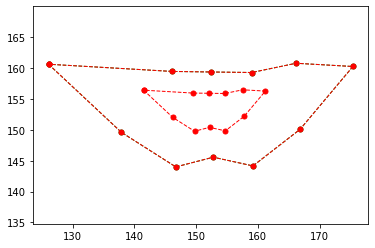

In [17]:
x, y = outer_mouth.exterior.xy
plt.plot(x,y, color='green', marker='o', linestyle='dashed', linewidth=1, markersize=5)

x, y = shrunk_mouth.exterior.xy
plt.plot(x,y, color='red', marker='o', linestyle='dashed', linewidth=1, markersize=5)

x, y = swollen_mouth.exterior.xy
plt.plot(x,y, color='red', marker='o', linestyle='dashed', linewidth=1, markersize=5)

# to net let the image be distorted along the axis
plt.axis('equal')
plt.show() 

In [44]:
! python --version

Python 3.6.13 :: Anaconda, Inc.


##### shrink_x, shrink_y = shrunk_mouth.exterior.xy
o_x, o_y = outer_mouth.exterior.xy

print(len(shrink_x))
print(len(o_x))

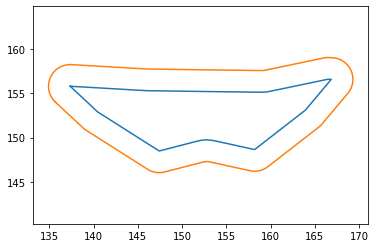

In [93]:
#     visualize for debugging
x, y = shrunk_mouth.exterior.xy
plt.plot(x,y)

x, y = swelled_mouth.exterior.xy
plt.plot(x,y)
# to net let the image be distorted along the axis
plt.axis('equal')
plt.show() 

In [99]:
swell_x, swell_y = swelled_mouth.exterior.xy
shrink_x, shrink_y = shrunk_mouth.exterior.xy

In [103]:
len(swell_y)

92

In [104]:
len(shrink_y)

21

11